In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/Ozodiy/A-model-for-determining-the-effect-of-advertising-on-sales/main/reklama_sales.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [16]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [17]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

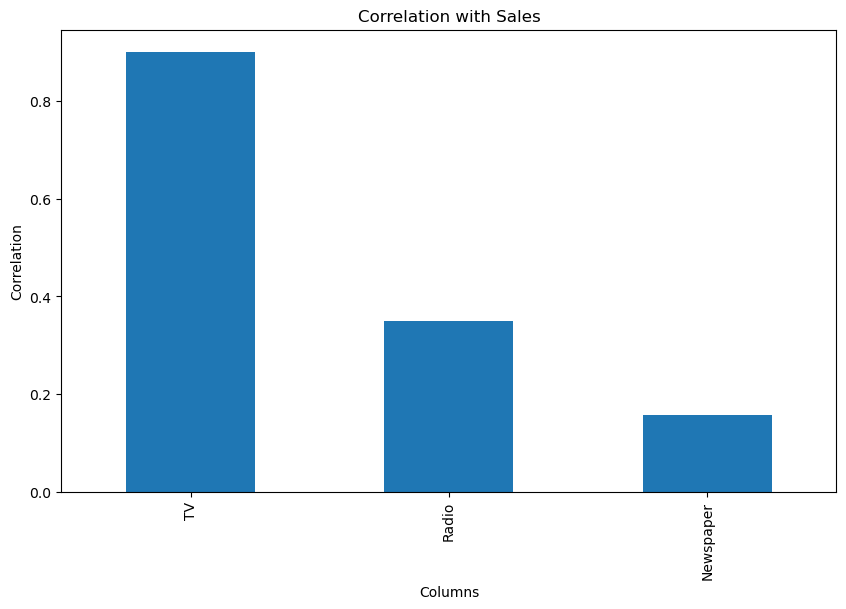

In [18]:
# Calculate the correlation coefficients
correlation = df.corr()['Sales']

# Remove the Sales column from the correlation coefficients
correlation = correlation.drop('Sales')

# Create a bar plot to visualize the correlations
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation with Sales')
plt.show()


In [19]:
df_fil = df.drop(['Radio', 'Newspaper'], axis=1)
df_fil.head(10)


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,15.6


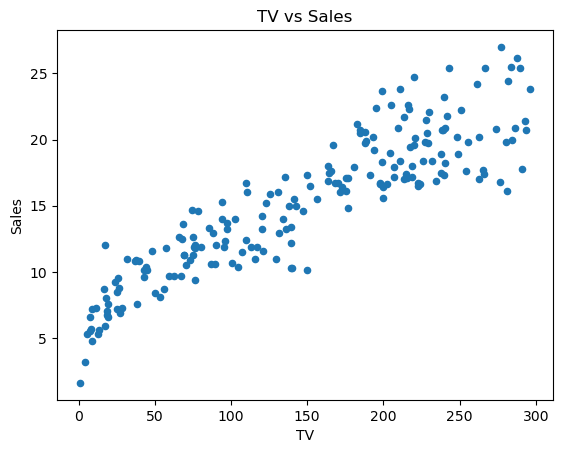

In [20]:
df_fil.plot(x='TV', y='Sales', kind='scatter')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()



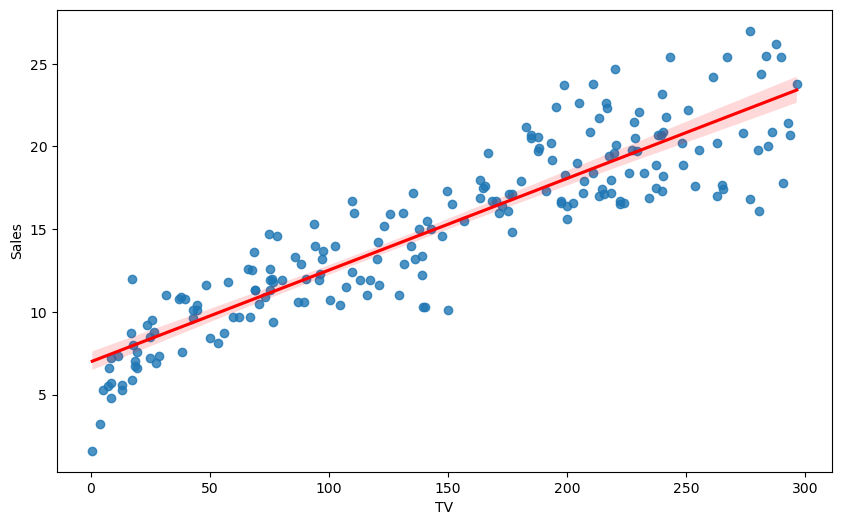

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_fil, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

In [22]:
X = df_fil['Sales'].to_numpy()
X

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [23]:
Y = df_fil['TV'].to_numpy()
Y

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [24]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(Y)

In [25]:

X = np.array(X).reshape(-1, 1)
y = np.array(Y).reshape(-1, 1)  # Fix the variable name to 'Y'
y = y.reshape(-1, 1)

theta1 = sum((X - Xmean) * (y - ymean)) / sum((X - Xmean) ** 2)
print(f"{theta1=}")

theta1=array([14.64309139])


In [26]:
theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta0=array([-74.5147943])


In [27]:
x_test = df_fil.sample(10, random_state=42)['Sales'].to_numpy()
print(f"{x_test=}")
y_test = df_fil.sample(10, random_state=42)['TV'].to_numpy()
print(f"{y_test=}")

x_test=array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1])
y_test=array([163.3, 195.4, 292.9,  11.7, 220.3,  75.1, 216.8,  50. , 222.4,
       175.1])


In [28]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([172.95345022, 253.49045287, 238.84736148,  32.37977286,
       287.16956307, 109.98815723, 252.02614373,  48.48717339,
       167.09621366, 161.2389771 ])


In [29]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=35.013781435059755


In [30]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=41.23052160557236


***Linear Regresion find with Scikit-learn***

In [31]:
df_fil.shape

(200, 2)

In [32]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_fil, test_size=0.10, random_state=42)

In [33]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['Sales']])
y_train = np.asanyarray(train_set[['TV']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz 
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=14.736137021451194
theta0=-76.06606517664946


Text(0, 0.5, 'TV')

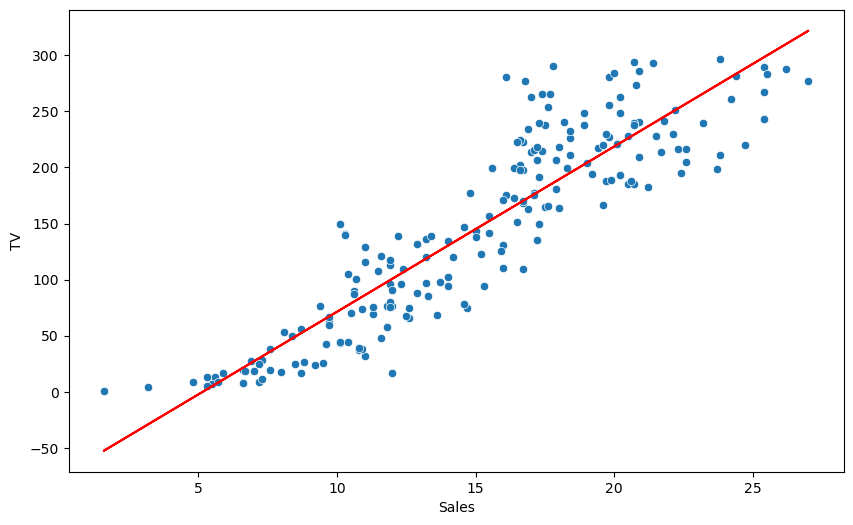

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_fil, x='Sales', y='TV')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Sales")
plt.ylabel("TV")

In [35]:
x_test = np.asanyarray(test_set[['Sales']])
y_test = np.asanyarray(test_set[['TV']])

In [36]:
y_predict = LR_model.predict(x_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=31.000948320149927
RMSE=38.892567161637686
